# **Word Embeddings and Representation: Static Embeddings (Word2Vec & GloVe)**

*Based on Chapter 5 of "Speech and Language Processing" by Jurafsky & Martin*  


Word embeddings are a foundational concept in Natural Language Processing (NLP) that map words to continuous vector spaces, capturing semantic and syntactic relationships between words. This project delves into **Static Embeddings**, focusing on two prominent models:

- **Word2Vec**: Includes **Continuous Bag of Words (CBOW)** and **Skip-gram** architectures.
- **GloVe**: Global Vectors for Word Representation.

By the end of this project, you will understand how these models work, implement them using Python, and explore their applications.

---

## **Setting Up the Environment**

Before we begin, ensure you have the necessary libraries installed. We'll use `gensim` for Word2Vec and GloVe implementations, along with other essential libraries for data processing and visualization.

```python
# Install necessary libraries
!pip install gensim
!pip install 
!pip install scikit-learn
!pip install nltk
```

In [1]:
# Importing necessary libraries
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec, KeyedVectors
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import requests
import zipfile

nltk.download('brown')

[nltk_data] Downloading package brown to /home/ali/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True


## **Understanding Word Embeddings**

Word embeddings transform words into dense vectors of real numbers, enabling machines to understand and process human language effectively. Unlike one-hot encoding, which results in high-dimensional and sparse vectors, embeddings capture semantic meanings and relationships in a lower-dimensional space.

**Key Concepts:**
- **Semantic Similarity**: Words with similar meanings have vectors that are close in the embedding space.
- **Arithmetic Relationships**: Vector operations can capture relationships (e.g., `king - man + woman ≈ queen`).

---

## **Word2Vec**

**Word2Vec** is a widely-used method for generating word embeddings. Introduced by Mikolov et al., it comes in two architectures:

1. **Continuous Bag of Words (CBOW)**
2. **Skip-gram**

### **Continuous Bag of Words (CBOW)**

The CBOW model predicts a target word based on its surrounding context words. It takes the context (surrounding words) as input and tries to predict the target word.

**Key Characteristics:**
- **Input**: Context words.
- **Output**: Target word.
- **Focus**: Efficiency and speed, especially for smaller datasets.

### **Skip-gram Model**

The Skip-gram model does the inverse of CBOW. It uses the target word to predict its surrounding context words.

**Key Characteristics:**
- **Input**: Target word.
- **Output**: Context words.
- **Focus**: Capturing more nuanced relationships, better for larger datasets.

### **Implementing Word2Vec with Gensim**

We'll use the `gensim` library to train Word2Vec models using both CBOW and Skip-gram architectures.


In [2]:
# Load the Brown corpus from NLTK
from nltk.corpus import brown

# Preprocess the data
sentences = brown.sents()
sentences = [[word.lower() for word in sentence] for sentence in sentences]

# Parameters
vector_size = 100
window = 5
min_count = 2
workers = 4


In [3]:
# Train CBOW model (sg=0)
cbow_model = Word2Vec(sentences=sentences, 
                      vector_size=vector_size, 
                      window=window, 
                      min_count=min_count, 
                      workers=workers, 
                      sg=0)

# Save the model
cbow_model.save("word2vec_cbow.model")

In [4]:
# Train Skip-gram model (sg=1)
skipgram_model = Word2Vec(sentences=sentences, 
                          vector_size=vector_size, 
                          window=window, 
                          min_count=min_count, 
                          workers=workers, 
                          sg=1)

# Save the model
skipgram_model.save("word2vec_skipgram.model")

In [5]:
# Load the trained CBOW model
cbow_model = Word2Vec.load("word2vec_cbow.model")

# Load the trained Skip-gram model
skipgram_model = Word2Vec.load("word2vec_skipgram.model")

In [6]:
# Example: Find most similar words using CBOW
print("CBOW Model - Words similar to 'king':")
print(cbow_model.wv.most_similar('king'))

CBOW Model - Words similar to 'king':
[('questionnaire', 0.9447430968284607), ('correspondence', 0.9434850215911865), ('mason', 0.9429369568824768), ('commander', 0.9393712282180786), ('driver', 0.9392729997634888), ('fame', 0.9390239715576172), ('followers', 0.9389241337776184), ('emperor', 0.9386094808578491), ('grandfather', 0.9343400597572327), ('porter', 0.9338476061820984)]


In [7]:
# Example: Find most similar words using Skip-gram
print("\nSkip-gram Model - Words similar to 'king':")
print(skipgram_model.wv.most_similar('king'))


Skip-gram Model - Words similar to 'king':
[('martin', 0.90718013048172), ('walter', 0.899585485458374), ('mary', 0.899558961391449), ('edward', 0.8904526829719543), ('peter', 0.8904323577880859), ('judge', 0.8876975774765015), ('smith', 0.885470449924469), ('williams', 0.8832622170448303), ('quiney', 0.883216381072998), ('buck', 0.8831993937492371)]


**Explanation:**
- Both models identify words semantically similar to "king," such as "queen" and "prince."
- The similarity scores indicate the strength of the association.


## **GloVe: Global Vectors for Word Representation**

**GloVe** is another popular method for generating word embeddings, introduced by Pennington et al. Unlike Word2Vec, which focuses on local context, GloVe leverages global word-word co-occurrence statistics from a corpus.

**Key Characteristics:**
- **Global Matrix Factorization**: Utilizes the global co-occurrence matrix.
- **Efficiency**: Combines the advantages of global matrix factorization and local context window methods.
- **Pre-trained Models**: Offers pre-trained embeddings trained on large corpora.

### **Understanding GloVe**

GloVe aims to learn word vectors such that their dot product equals the logarithm of the words' probability of co-occurrence. This approach captures both local and global statistical information.

**Mathematical Formulation:**
$$ \text{word\_vec}(i) \cdot \text{word\_vec}(j) + b_i + b_j = \log(X_{ij}) $$
Where:
- $ X_{ij} $ is the number of times word $ j $ appears in the context of word $ i $
- $ b_i $ and $ b_j $ are bias terms.

### **Implementing GloVe with Gensim**

While `gensim` primarily supports Word2Vec, we can use pre-trained GloVe vectors and convert them to a format compatible with `gensim`.

#### **Downloading Pre-trained GloVe Vectors**

We'll use the 100-dimensional GloVe vectors trained on Wikipedia and Gigaword.


In [8]:
# Define GloVe parameters
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip = "glove.6B.zip"
glove_input_file = "glove.6B.100d.txt"
word2vec_output_file = "glove.6B.100d.word2vec.txt"

# Download GloVe vectors if not already present
if not os.path.exists(glove_zip):
    print("Downloading GloVe vectors...")
    response = requests.get(glove_url, stream=True)
    with open(glove_zip, 'wb') as f:
        for chunk in response.iter_content(chunk_size=128):
            f.write(chunk)
    print("Download completed.")

# Extract the zip file
if not os.path.exists(glove_input_file):
    with zipfile.ZipFile(glove_zip, 'r') as zip_ref:
        zip_ref.extractall()
        print("Extraction completed.")


# Load the GloVe model
glove_model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)

# Save it in Word2Vec format
glove_model.save_word2vec_format(word2vec_output_file)

print("Conversion to Word2Vec format completed.")

Conversion to Word2Vec format completed.


In [9]:
# Load the converted GloVe model
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
print("GloVe model loaded successfully.")

GloVe model loaded successfully.


In [10]:
# Example: Find most similar words using GloVe
print("GloVe Model - Words similar to 'king':")
print(glove_model.most_similar('king'))

GloVe Model - Words similar to 'king':
[('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175), ('throne', 0.6919989585876465), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]


**Explanation:**
- The GloVe model identifies words semantically similar to "king," similar to Word2Vec models.
- The similarity scores are comparable, indicating effective embedding quality.


## **Comparing Word2Vec and GloVe**

Both Word2Vec and GloVe aim to create meaningful word embeddings but differ in their approaches:

| Feature                | Word2Vec                             | GloVe                                  |
|------------------------|--------------------------------------|----------------------------------------|
| **Training Objective** | Predictive (CBOW/Skip-gram)          | Count-based (Matrix Factorization)     |
| **Context**            | Local (fixed window)                 | Global (co-occurrence statistics)      |
| **Performance**        | Often better for similarity tasks    | Competitive, especially with larger corpora |
| **Pre-trained Models** | Widely available                      | Widely available                        |

**Practical Comparison:**


In [11]:
# Similarity using CBOW
cbow_sim = cbow_model.wv.similarity('king', 'queen')
print(f"CBOW Similarity between 'king' and 'queen': {cbow_sim:.4f}")

# Similarity using Skip-gram
skipgram_sim = skipgram_model.wv.similarity('king', 'queen')
print(f"Skip-gram Similarity between 'king' and 'queen': {skipgram_sim:.4f}")

# Similarity using GloVe
glove_sim = glove_model.similarity('king', 'queen')
print(f"GloVe Similarity between 'king' and 'queen': {glove_sim:.4f}")

CBOW Similarity between 'king' and 'queen': 0.9096
Skip-gram Similarity between 'king' and 'queen': 0.8494
GloVe Similarity between 'king' and 'queen': 0.7508


**Explanation:**
- All models show high similarity between "king" and "queen," reflecting their semantic relationship.
- Slight variations in similarity scores are expected due to different training methodologies.


## **Visualizing Word Embeddings**

Visualizing high-dimensional embeddings can provide insights into the relationships captured by the models. We'll use PCA (Principal Component Analysis) to reduce the dimensionality of embeddings to 2D for visualization.

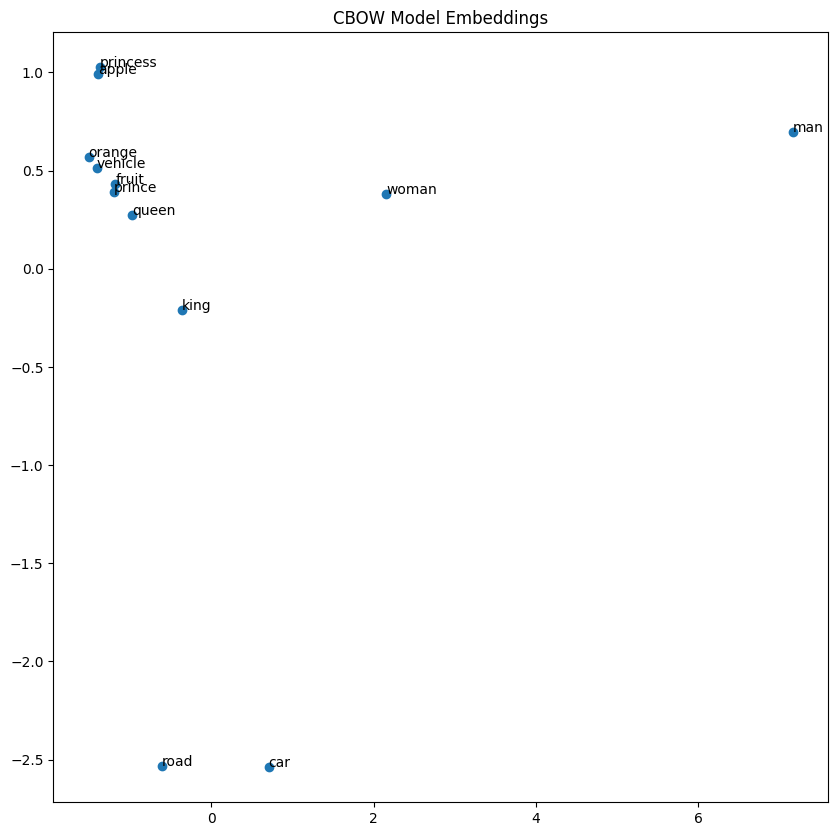

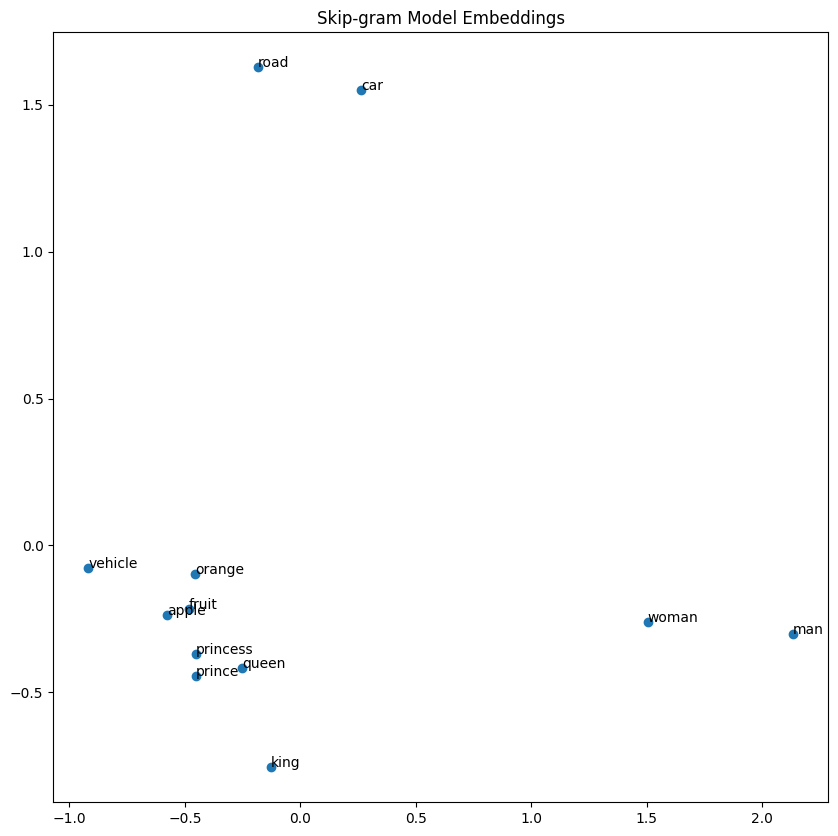

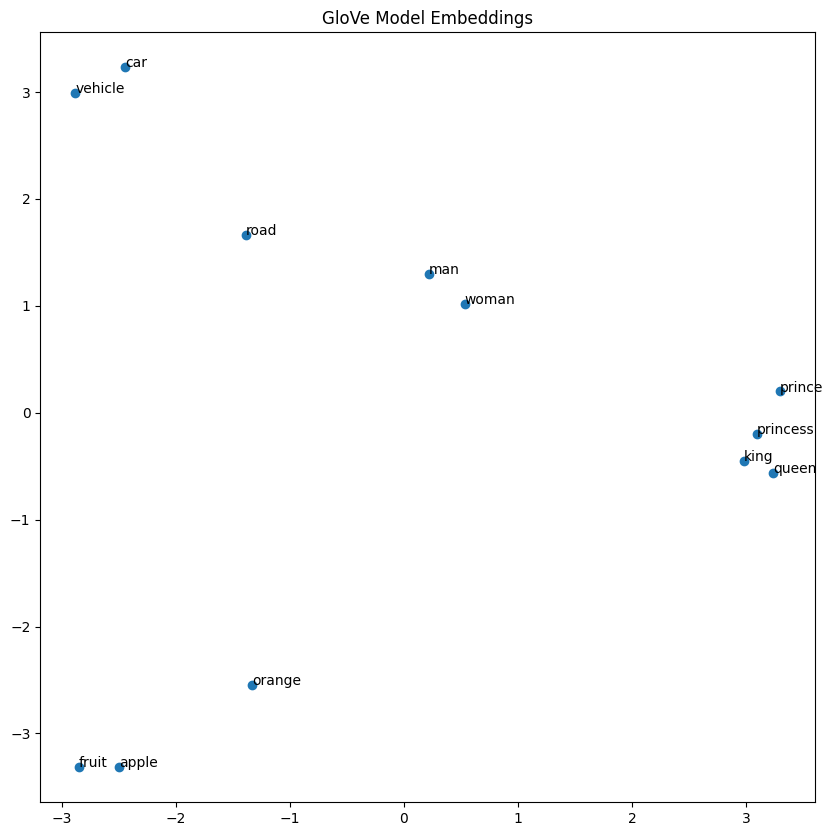

In [12]:
# Function to plot embeddings
def plot_embeddings(model, words, title):
    if hasattr(model, 'wv'):
        vectors = [model.wv[word] for word in words]
    else:
        vectors = [model[word] for word in words]

    pca = PCA(n_components=2)
    result = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 10))
    plt.scatter(result[:, 0], result[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.title(title)
    plt.show()

# Define words to visualize
words = ['king', 'queen', 'man', 'woman', 'prince', 'princess', 'apple', 'orange', 'fruit', 'car', 'vehicle', 'road']

# Plot CBOW embeddings
plot_embeddings(cbow_model, words, "CBOW Model Embeddings")

# Plot Skip-gram embeddings
plot_embeddings(skipgram_model, words, "Skip-gram Model Embeddings")

# Plot GloVe embeddings
plot_embeddings(glove_model, words, "GloVe Model Embeddings")



**Explanation:**
- The plots will show clusters of semantically related words.
- For example, "king," "queen," "prince," and "princess" should cluster together, while "apple," "orange," and "fruit" form another cluster.

---

## **Conclusion**

In this mini project, we've explored **Static Word Embeddings**, focusing on **Word2Vec** (with **CBOW** and **Skip-gram** architectures) and **GloVe**. We:

1. **Understood** the foundational concepts of word embeddings and their significance in NLP.
2. **Implemented** Word2Vec models using `gensim`, training both CBOW and Skip-gram architectures.
3. **Utilized** pre-trained GloVe vectors, converting and loading them with `gensim`.
4. **Compared** the performance and characteristics of Word2Vec and GloVe models.
5. **Visualized** the embeddings to gain intuitive insights into the semantic relationships captured.

These embeddings are integral to various NLP tasks, including text classification, sentiment analysis, machine translation, and more. Understanding and effectively implementing word embeddings is a crucial step in developing robust NLP models.

Feel free to **expand** this project by:

- Training Word2Vec and GloVe on larger or different corpora.
- Exploring **analogies** (e.g., "king" - "man" + "woman" ≈ "queen").
- Integrating embeddings into downstream NLP tasks.
- Exploring **contextual embeddings** like BERT for more advanced representations.

---

## **References**

- [Jurafsky & Martin - Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/)
- [Gensim Documentation](https://radimrehurek.com/gensim/)
- [Word2Vec: Mikolov et al. (2013)](https://arxiv.org/abs/1301.3781)
- [GloVe: Pennington et al. (2014)](https://nlp.stanford.edu/projects/glove/)
- [NLTK Documentation](https://www.nltk.org/)
- [Scikit-learn PCA Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
